# Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Leitura de Dados

In [2]:
iris_data = pd.read_csv('/home/pedro/Documentos/024.2/icdados/data/data_base//iris.csv')
vehicle_data = pd.read_csv('/home/pedro/Documentos/024.2/icdados/data/data_base/Vehicle.csv')

# Questão 1

## Separar atributos e rótulos

In [3]:
x_iris = iris_data.iloc[:, :-1].to_numpy()  
y_iris = iris_data.iloc[:, -1].to_numpy()  
x_vehicle = vehicle_data.iloc[:, :-1].to_numpy()
y_vehicle = vehicle_data.iloc[:, -1].to_numpy()

## Função para calcular a acurácia média

In [4]:
def knn_accuracy_with_variance(X, y, max_k=35, n_repeats=35):
    mean_scores = {}
    std_scores = {}

    for k in range(1, max_k + 1):
        repeat_scores = []
        for _ in range(n_repeats):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train, y_train)
            y_predict = model.predict(X_test)
            acc = accuracy_score(y_test, y_predict)
            repeat_scores.append(acc)

        mean_scores[k] = np.mean(repeat_scores)
        std_scores[k] = np.std(repeat_scores)

    return mean_scores, std_scores

In [5]:
mean_accuracy_iris, std_accuracy_iris = knn_accuracy_with_variance(x_iris, y_iris, n_repeats=35)
mean_accuracy_vehicle, std_accuracy_vehicle = knn_accuracy_with_variance(x_vehicle, y_vehicle, n_repeats=35)
vk = list(range(1, 36))
mean_accuracy_iris_list = [mean_accuracy_iris[k] for k in vk]
std_accuracy_iris_list = [std_accuracy_iris[k] for k in vk]
mean_accuracy_vehicle_list = [mean_accuracy_vehicle[k] for k in vk]
std_accuracy_vehicle_list = [std_accuracy_vehicle[k] for k in vk]

## Plot dos graficos do data Iris e Vehicile

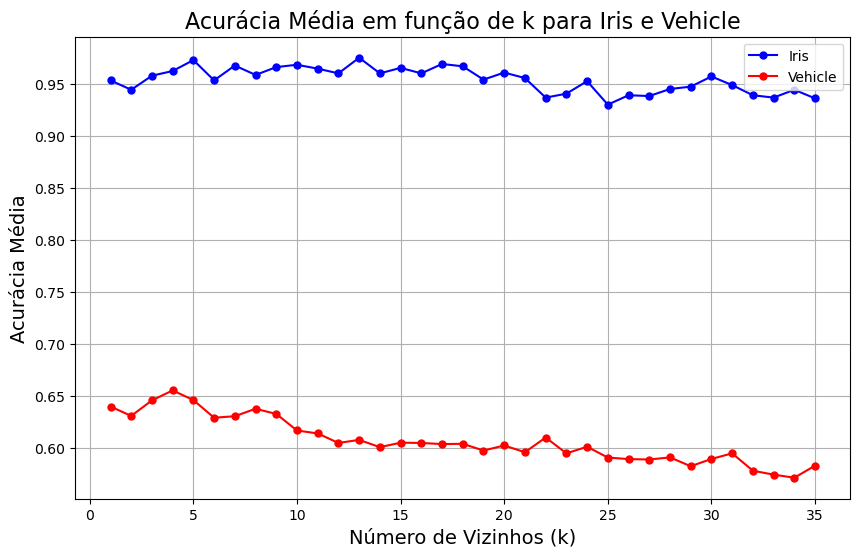

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(vk, mean_accuracy_iris_list, '-bo', label='Iris', markersize=5)
plt.plot(vk, mean_accuracy_vehicle_list, '-ro', label='Vehicle', markersize=5)
plt.xlabel('Número de Vizinhos (k)', fontsize=14)
plt.ylabel('Acurácia Média', fontsize=14)
plt.title('Acurácia Média em função de k para Iris e Vehicle', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

Com base nesse grafico é possivel detectar que nem sempre um método obterá bons resultados pra diferentes dfś

## Graficos de erros

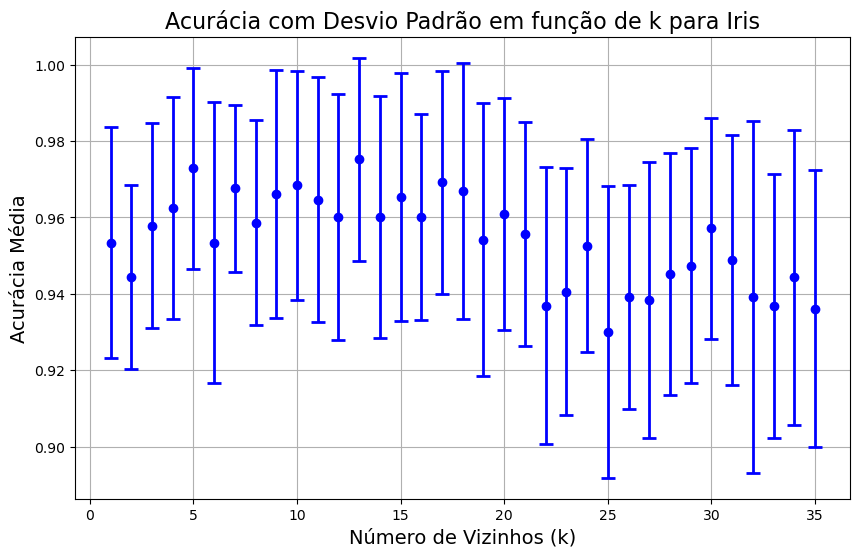

In [7]:
plt.figure(figsize=(10, 6))
plt.errorbar(vk, mean_accuracy_iris_list, yerr=std_accuracy_iris_list, fmt='o', capsize=5, color='blue', elinewidth=2, capthick=2)
plt.xlabel('Número de Vizinhos (k)', fontsize=14)
plt.ylabel('Acurácia Média', fontsize=14)
plt.title('Acurácia com Desvio Padrão em função de k para Iris', fontsize=16)
plt.grid(True)
plt.show()

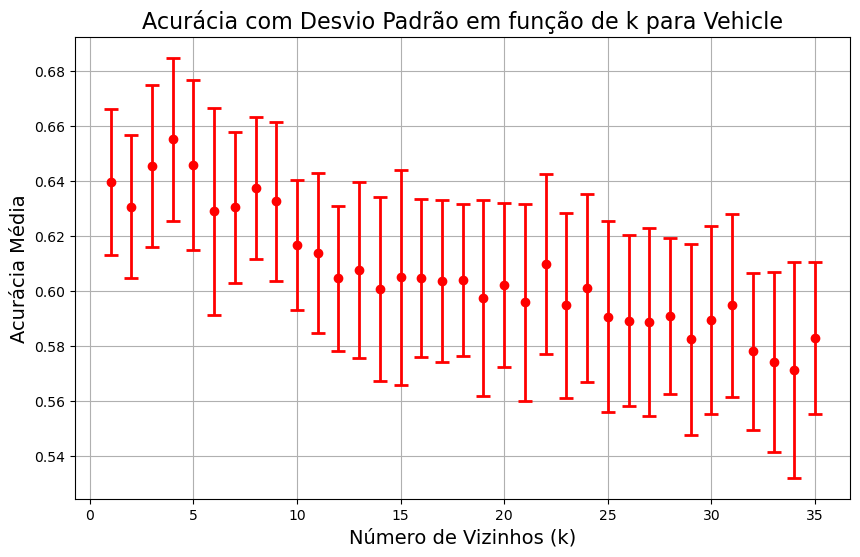

In [8]:
plt.figure(figsize=(10, 6))
plt.errorbar(vk, mean_accuracy_vehicle_list, yerr=std_accuracy_vehicle_list, fmt='o', capsize=5, color='red', elinewidth=2, capthick=2)
plt.xlabel('Número de Vizinhos (k)', fontsize=14)
plt.ylabel('Acurácia Média', fontsize=14)
plt.title('Acurácia com Desvio Padrão em função de k para Vehicle', fontsize=16)
plt.grid(True)
plt.show()

Esses graficos plotei mais por curiosidade sobre o comportamento da acuracia conforme a qtde de k vizinhos

# Questão 2:

## Gerando dados da questão

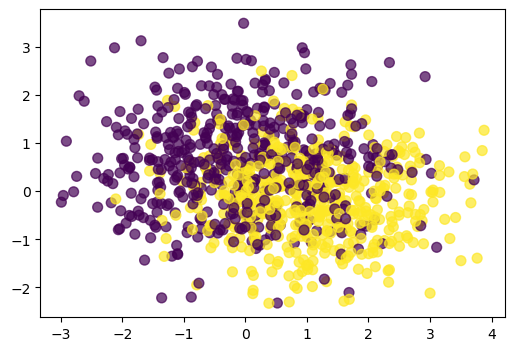

In [9]:
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.9)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

## Função para plotar as regioes de decisão

In [10]:
def plot_knn_logistic(X_train, y_train, k_values):
    plt.figure(figsize=(15, 6))

    for i, k in enumerate(k_values):
        plt.subplot(1, len(k_values) + 1, i + 1)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        plot_decision_regions(X=X_train, y=y_train, clf=knn, legend=2)
        plt.title(f'KNN (k={k})')
    
    plt.subplot(1, len(k_values) + 1, len(k_values) + 1)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    plot_decision_regions(X=X_train, y=y_train, clf=log_reg, legend=2)
    plt.title('Logistic Regression')

    plt.tight_layout()
    plt.show()

## Plot das areas de decisões

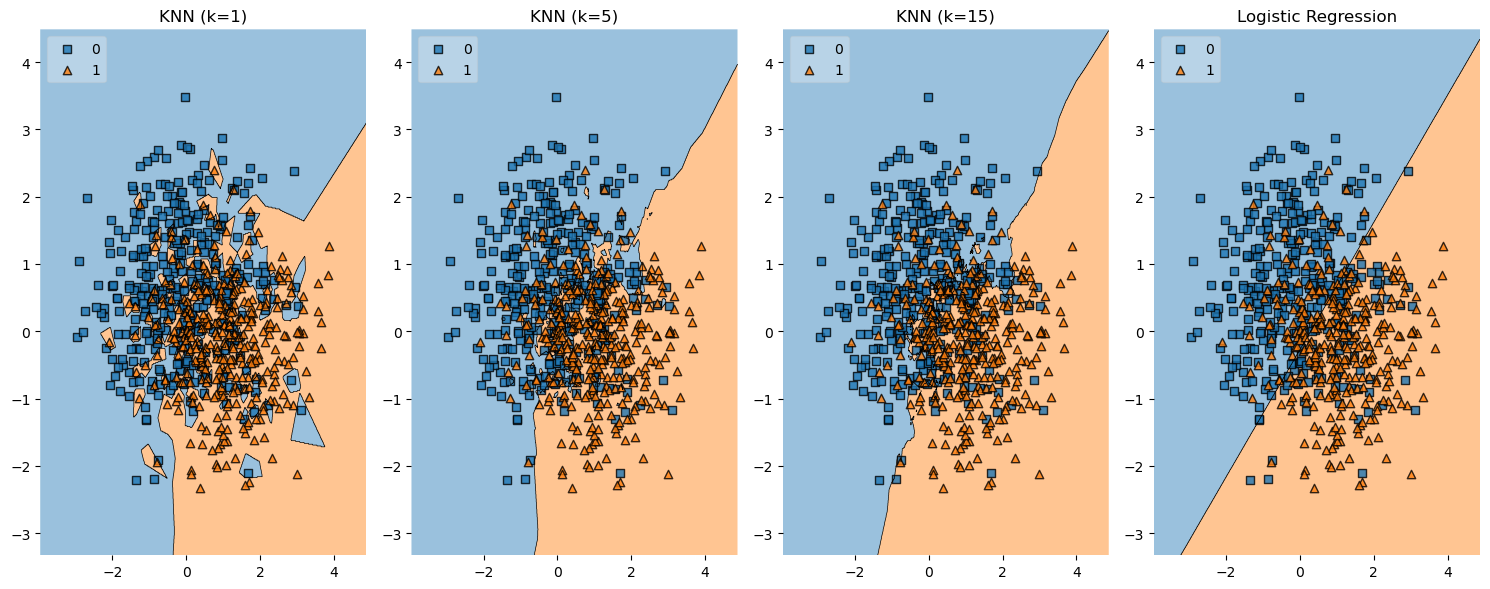

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
k_values = [1, 5, 15]
plot_knn_logistic(X_train, y_train, k_values)


O KNN lida bem com fronteiras de decisão complexas, enquanto a regressão logística, por ser linear, tem dificuldade em capturar a não-linearidade dos dados gerados pela função

# Questão 3:

## Separar atributos e rótulos

In [12]:
X_vehicle = vehicle_data.iloc[:, :-1].values
y_vehicle = vehicle_data.iloc[:, -1].values

In [13]:
X_iris = iris_data.iloc[:, :-1].values
y_iris = iris_data.iloc[:, -1].values

## Normalizar os dados

In [14]:
scaler_iris = StandardScaler().fit(X_iris)
X_iris = scaler_iris.transform(X_iris)

scaler_vehicle = StandardScaler().fit(X_vehicle)
X_vehicle = scaler_vehicle.transform(X_vehicle)

## Função para calcular a acurácia média usando validação cruzada para Regressão Logística

In [15]:
def logistic_regression_accuracy(X, y):
    model = LogisticRegression(max_iter=1000)
    cv = cross_validate(model, X, y, cv=5)
    return cv['test_score'].mean()

# Obter as acurácias médias para Regressão Logística no dataset Iris e Vehicle

In [16]:
accuracy_iris_log_reg = logistic_regression_accuracy(X_iris, y_iris)
accuracy_vehicle_log_reg = logistic_regression_accuracy(X_vehicle, y_vehicle)

In [17]:
accuracy_iris_log_reg

0.9600000000000002

In [18]:
max = np.max(mean_accuracy_iris_list)
max


0.9751879699248119

Neste caso em especifico o modelo de k vizinhos se comporta melhor q o de regressão logistica

In [19]:
accuracy_vehicle_log_reg

0.7872537417333797

In [20]:
max_v = np.max(mean_accuracy_vehicle_list)
max_v

0.6552560646900271

Embora ainda tenha uma "baixa" acuracia é preferivel o modelo de regressão